### Exercise 1c)

In [133]:
# Imports

%load_ext autoreload
%autoreload 1

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
# Defining the Runge function
def f(x):
    return 1/(1+25*x**2)

In [135]:
%aimport methods.training_methods, methods.step_methods, methods.regression_methods
from methods.training_methods import GradientDescent, StochasticGradientDescent
from methods.step_methods import ConstantGradientStep, MomentumGradientStep, ADAgradStep, RMSpropStep, AdamStep
from methods.regression_methods import OLS_Gradient, Ridge_Gradient, Lasso_Gradient
from sklearn.preprocessing import PolynomialFeatures

# Defining dataset

np.random.seed(124)

num = 400
x = np.linspace(-1, 1, num)
y = f(x) + 0.05*np.random.normal(0, 1, num)

In [136]:
p = 6
X = PolynomialFeatures(p,include_bias = False).fit_transform(x.reshape(-1, 1))
num_features = X.shape[1]

#np.random.seed(1234)
theta = np.random.uniform(-1, 1, X.shape[1])
iterations = 20000

MSE for 10000 iterations for learning_rate =  0.01 :  0.010067112670239128
MSE for 10000 iterations for learning_rate =  0.0517 :  0.009711120926000062
MSE for 10000 iterations for learning_rate =  0.09339 :  0.00981011586148252
MSE for 10000 iterations for learning_rate =  0.13509 :  0.009813930290359612
MSE for 10000 iterations for learning_rate =  0.17678 :  0.009814071352681879
MSE for 10000 iterations for learning_rate =  0.21848 :  0.009814076558844576
MSE for 10000 iterations for learning_rate =  0.26018 :  0.009814076750872517
MSE for 10000 iterations for learning_rate =  0.30187 :  0.009814076757951538
MSE for 10000 iterations for learning_rate =  0.34357 :  0.01077151925438024


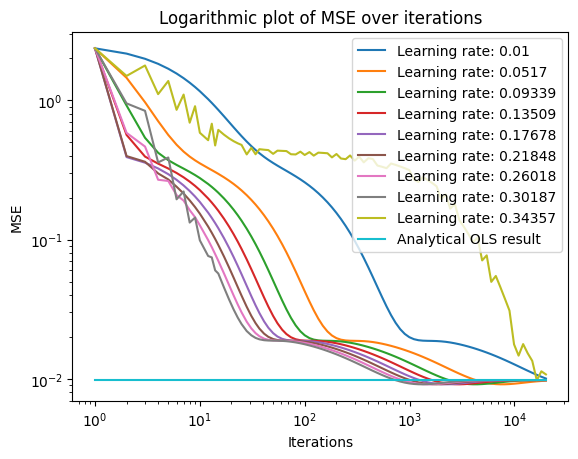

In [137]:
# Ordinary gradient descent for different learning rates, OLS regression
learning_rates = np.linspace(0.01,0.34357,9)   # 0.355 for p = 5

for i in range(len(learning_rates)): 
    gd_constant = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ConstantGradientStep(learning_rate=learning_rates[i]))
    mse_data_gd_constant_step = gd_constant.train(iterations=iterations)
    analytical_mse = gd_constant.analytical_OLS_mse()
    print("MSE for 10000 iterations for learning_rate = ", round(learning_rates[i],5),": ",mse_data_gd_constant_step[1][len(mse_data_gd_constant_step[1]) - 1])
    plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label=f"Learning rate: {round(learning_rates[i],5)}")
    plt.xlabel("Iterations")
    plt.ylabel("MSE")
    plt.loglog()
    plt.grid()
    plt.legend()

plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*analytical_mse,label="Analytical OLS result")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Logarithmic plot of MSE over iterations")
plt.loglog()
plt.grid()
plt.legend()

plt.title("Logarithmic plot of MSE over iterations")
plt.show()

MSE for 10000 iterations for learning_rate =  0.01 :  0.05005974030571722
MSE for 10000 iterations for learning_rate =  0.0184 :  0.05005974030571722
MSE for 10000 iterations for learning_rate =  0.0268 :  0.05005974030571722
MSE for 10000 iterations for learning_rate =  0.0352 :  0.05005974030571722
MSE for 10000 iterations for learning_rate =  0.0436 :  0.050059740305717214
MSE for 10000 iterations for learning_rate =  0.0521 :  0.05005974030571722
MSE for 10000 iterations for learning_rate =  0.0605 :  0.050059740305717214
MSE for 10000 iterations for learning_rate =  0.0689 :  0.050059740305717214
MSE for 10000 iterations for learning_rate =  0.0773 :  0.04751906054713052


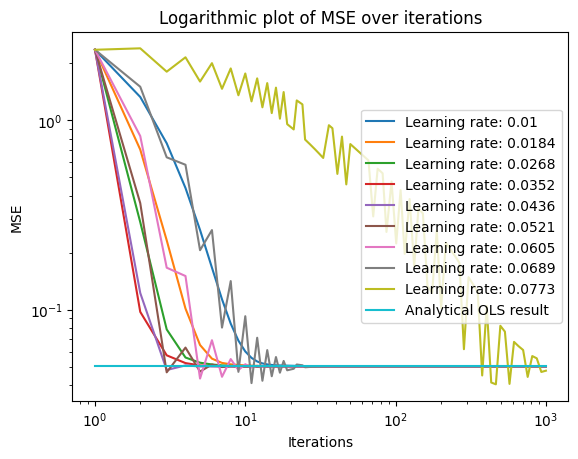

In [138]:
# Performing ordinary gradient descent for Ridge regression

iterations = 10**3

learning_rates = np.linspace(0.01,0.0773,9)

for i in range(len(learning_rates)): 
    gd_constant = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ConstantGradientStep(learning_rate=learning_rates[i]))
    mse_data_gd_constant_step = gd_constant.train(iterations=iterations)
    analytical_mse = gd_constant.analytical_Ridge_mse(10**1)
    print("MSE for 10000 iterations for learning_rate = ", round(learning_rates[i],4),": ",mse_data_gd_constant_step[1][len(mse_data_gd_constant_step[1]) - 1])
    plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label=f"Learning rate: {round(learning_rates[i],4)}")
    plt.xlabel("Iterations")
    plt.ylabel("MSE")
    plt.loglog()
    plt.grid()
    plt.legend(loc="right")

plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*analytical_mse,label="Analytical OLS result")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Logarithmic plot of MSE over iterations")
plt.loglog()
plt.grid()
plt.legend(loc="right")

plt.title("Logarithmic plot of MSE over iterations")
plt.show()